In [1]:
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import math

In [2]:
gd = [(i,j) for i in range(101) for j in range(101)]
n_grid = []
while(len(n_grid)<50):
    r = random.choice(gd)
    if r not in n_grid:
        n_grid.append(r)
print(n_grid)

[(98, 70), (87, 14), (69, 12), (90, 66), (91, 93), (62, 26), (70, 4), (38, 46), (28, 54), (16, 70), (67, 49), (22, 88), (83, 0), (28, 93), (65, 55), (94, 29), (9, 16), (76, 85), (48, 95), (40, 16), (15, 85), (8, 26), (16, 72), (88, 22), (74, 27), (81, 20), (55, 64), (84, 81), (26, 15), (28, 42), (42, 58), (72, 52), (81, 83), (84, 51), (42, 39), (74, 87), (93, 99), (72, 70), (58, 66), (71, 57), (16, 99), (81, 8), (64, 83), (13, 49), (48, 86), (70, 51), (80, 76), (47, 23), (30, 10), (54, 36)]


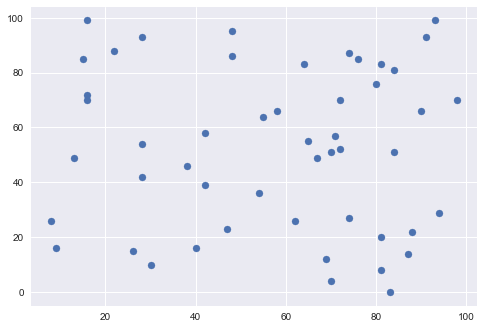

In [3]:
x = []
y = []
for i in range (50):
    c = n_grid[i]
    x.append(c[0])
    y.append(c[1])

plt.scatter(x, y)
plt.show()

In [4]:
def parent_gen(seed_n):  #no. of parents in gen1
    seed = []
    for i in range(50):
        seed.append(i)
    parent = []
    for i in range(seed_n):
        random.shuffle(seed)
        if seed not in parent:
            parent.append(seed[::])
            
    return parent

fitness function

In [5]:
def fitness(chromosome):
    fitness = 0
    for i in range(49):
        a = chromosome[i]
        b = chromosome[i + 1]
        fitness += math.sqrt((x[a]-x[b])**2 + (y[a]-y[b])**2)
    fitness += math.sqrt((x[b]-x[0])**2 + (y[b]-y[0])**2)
    return fitness

manhattan fitness

In [6]:
def manhattan_fitness(chromosome):
    fitness = 0
    for i in range (49):
        a = chromosome[i]
        b = chromosome[i + 1]
        fitness += abs(x[a]-x[b]) + abs(y[a]-y[b])
    return fitness

1 point crossover function

In [7]:
def crossover(chr1, chr2):
    r = random.randint(0, 49)
    c1 = chr1[:r] #child
    c2 = chr2[r:]
    for i in range(50):
        if chr2[i] not in c1:
            c1.append(chr2[i])
        if chr1[i] not in c2:
            c2.append(chr1[i])
    return c1, c2

mutation

In [8]:
def mutation(chr1):
    gen_rand = list(range(35))
    r = int(random.choice(gen_rand))
    mutated_ele = chr1.pop(r)
    chr1.append(mutated_ele)
    return chr1

reproduction by using euclidian fitness

In [9]:
seed = parent_gen(11)
pop = seed
n_gen = 50
avg_fitness = []
best_fitness = []
for j in range(n_gen):
    for i in range(11):
        rnd_gen_01 = random.randint(0, len(pop) - 1)
        rnd_gen_02 = random.randint(0, len(pop) - 1)
        child = crossover(pop[rnd_gen_01], pop[rnd_gen_02])
        pop.extend(child)
    #key = lambda x:fitness(x)
    pop.sort(key = lambda x:fitness(x))
    avgfit = sum(list(map(fitness, pop)))/len(pop)
    avg_fitness.append(avgfit)
    
    #Elimination
    pop.sort(key = lambda x:fitness(x))
    best_fitness.append(fitness(pop[0]))
    rnd_gen_03 = random.randint(7, 11)
    pop = pop[:len(pop) - (rnd_gen_03)]

results from euclidian fitness

In [10]:
print(len(pop))
print(pop[0])
print(fitness(pop[0]), fitness(pop[-1]))
fc = pop[0]

667
[0, 14, 10, 36, 3, 26, 28, 24, 33, 46, 49, 48, 2, 40, 9, 20, 11, 30, 27, 37, 16, 34, 8, 31, 17, 4, 15, 35, 47, 38, 41, 23, 1, 6, 29, 25, 5, 45, 12, 43, 44, 18, 22, 19, 21, 39, 7, 13, 42, 32]
2004.7270725915716 2367.657223964886


reproduction by using manhattan distance

In [11]:
seed = parent_gen(10)
pop = seed[::]
n_gen = 500
for j in range(n_gen):
    for i in range(11):
        rnd_gen_01 = random.randint(0, len(pop) - 1)
        rnd_gen_02 = random.randint(0, len(pop) - 1)
        child = crossover(pop[rnd_gen_01], pop[rnd_gen_02])
        pop.extend(child)
    #elimination
    #key = lambda x:manhattan_fitness(x)
    pop.sort(key = lambda x:manhattan_fitness(x))
    rnd_gen_03 = random.randint(7, 11)
    pop = pop[:len(pop) - (rnd_gen_03)]

results from manhattan fitness

In [12]:
print(len(pop))
print(pop[0])
print(manhattan_fitness(pop[0]), manhattan_fitness(pop[-1]))
fc = pop[0]

6533
[14, 46, 39, 19, 36, 17, 35, 18, 42, 28, 30, 34, 49, 8, 9, 20, 21, 16, 5, 25, 37, 27, 4, 13, 22, 11, 6, 23, 12, 41, 7, 47, 0, 3, 26, 31, 33, 43, 48, 29, 1, 2, 38, 45, 24, 15, 10, 40, 44, 32]
2188 2922


average of fitness vs. generation

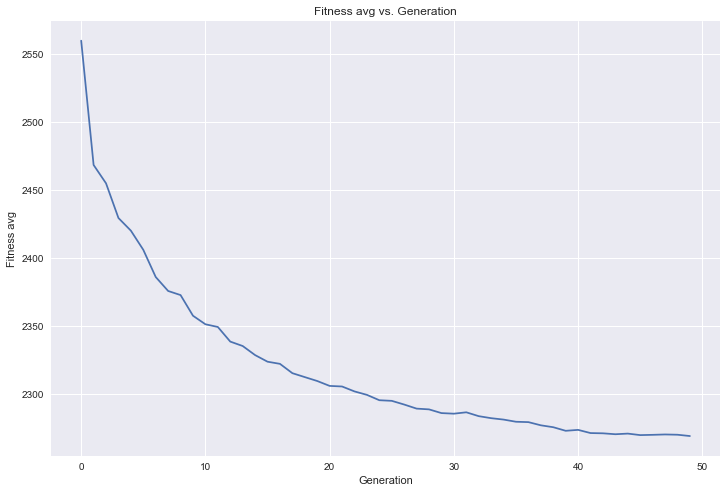

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))

#define X and Y axes
ax.plot(list(range(50)), avg_fitness)

#set plot title and axes labels
ax.set(title = "Fitness avg vs. Generation",
       xlabel = "Generation",
       ylabel = "Fitness avg")
plt.show()

best fitness vs generation

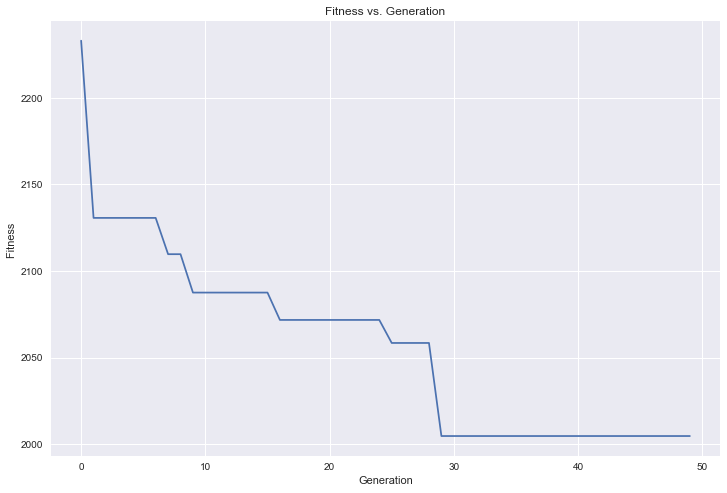

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(list(range(50)), best_fitness)

#set plot title and axes labels
ax.set(title = "Fitness vs. Generation",
       xlabel = "Generation",
       ylabel = "Fitness ")
plt.show()

printing final path

[14, 46, 39, 19, 36, 17, 35, 18, 42, 28, 30, 34, 49, 8, 9, 20, 21, 16, 5, 25, 37, 27, 4, 13, 22, 11, 6, 23, 12, 41, 7, 47, 0, 3, 26, 31, 33, 43, 48, 29, 1, 2, 38, 45, 24, 15, 10, 40, 44, 32]


<Figure size 648x648 with 0 Axes>

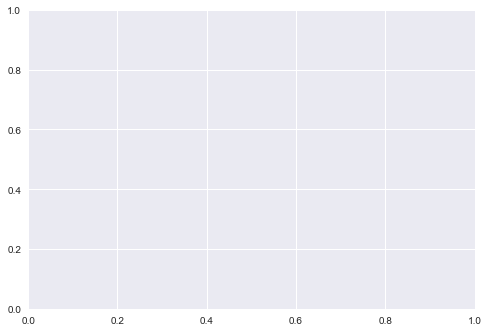

<Figure size 648x648 with 0 Axes>

In [15]:
print(fc)
for i in range (49):
    x1 = x[fc[i]]
    y1 = y[fc[i]]
    x2 = x[fc[i + 1]]
    y2 = y[fc[i + 1]]
    if(i == 0):
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2,ec='green')
    else:
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2) 
plt.figure(figsize = (9, 9))

# Is there any other way you can take the chromosome other than permutation encoding?

Yes, Binary, Value amd List Encodings
But Permutation Encoding is preferred as it is only really useful for problems dealing with ordering.

# If you change the number of populatoin in a generation, how the convergence is affected?

- Increasing the population
The convergence graph gets smoother with the increase in population.
The raye of convergence increases, ie, the graph value decreases extensively in the beginning, which decreases by smaller values steadily, towards the end.
Increasing the population caused the graph to be more convex downward.
Increasing the number of generations caused the cure to be smoother.

- Decreasing the population
On the other hand, decreasing the population caused the graph to be irregular. Increasing the number of generations didnt affect the irregularity of the graph that much.